<a href="https://colab.research.google.com/github/AtulAravindDas/MYMLDLDAPROJECTS/blob/main/AvocadoPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Data to be used: 2018 retail scan of Avocado market. Only Hass avocado data is given here

Attributes

<ul>
<li>Date: Date of Sale</li>
<li>Average Price: The average price of avocados in that date </li>
<li>Total Volume: Total number of avocados sold</li>
<li>Type: Conventional or Organic</li>
<li>Year: Year of sale</li>
<li>Region: Region of sale</li>
<li>4046: The total number of avocados sold with 4046 PLU</li>
<li>4225: The total number of avocados sold with 4046 PLU</li>
<li>4770: The total number of avocados sold with 4046 PLU</li>
</ul>

# **Import Libraries and obtain the dataset**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [24]:
avocado_dataframe=pd.read_csv("/content/drive/MyDrive/Datasets/avocado.csv")
avocado_dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# **Data Exploration**

In [25]:
avocado_dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
avocado_dataframe.drop('Unnamed: 0',axis=1,inplace=True)
avocado_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [27]:
avocado_dataframe.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
avocado_dataframe.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [29]:
avocado_dataframe.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [31]:
avocado_dataframe.tail(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


## **Sort the data using the Date**

In [32]:
avocado_dataframe=avocado_dataframe.sort_values(by='Date')
avocado_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


### **Check for Average Avocado price on every date**

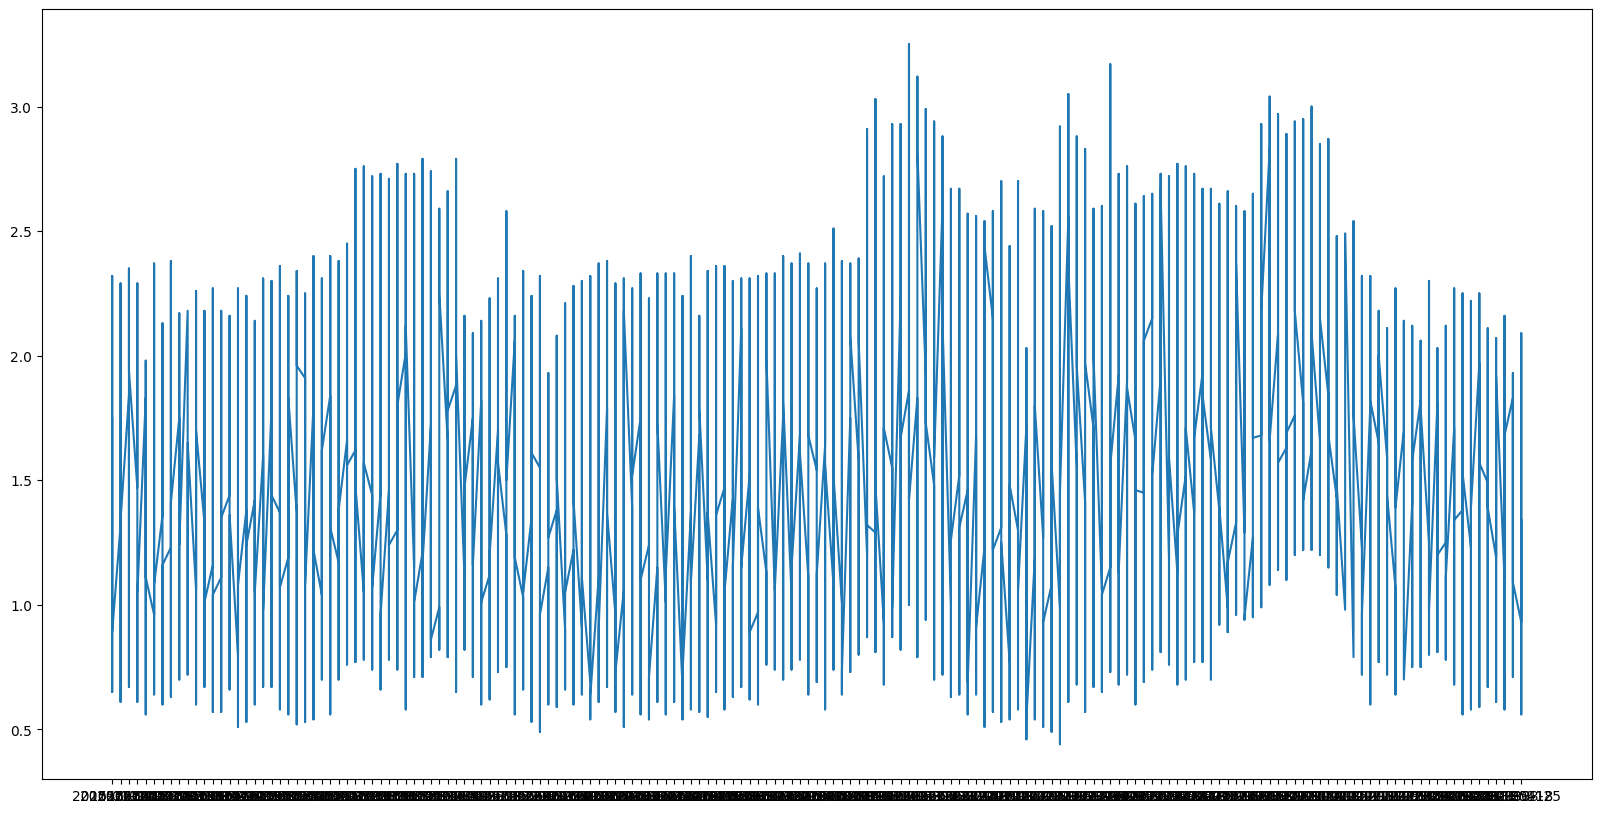

In [37]:
plt.figure(figsize=(20,10))
plt.plot(avocado_dataframe['Date'],avocado_dataframe['AveragePrice'])
plt.show()

## **Count the Regions**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

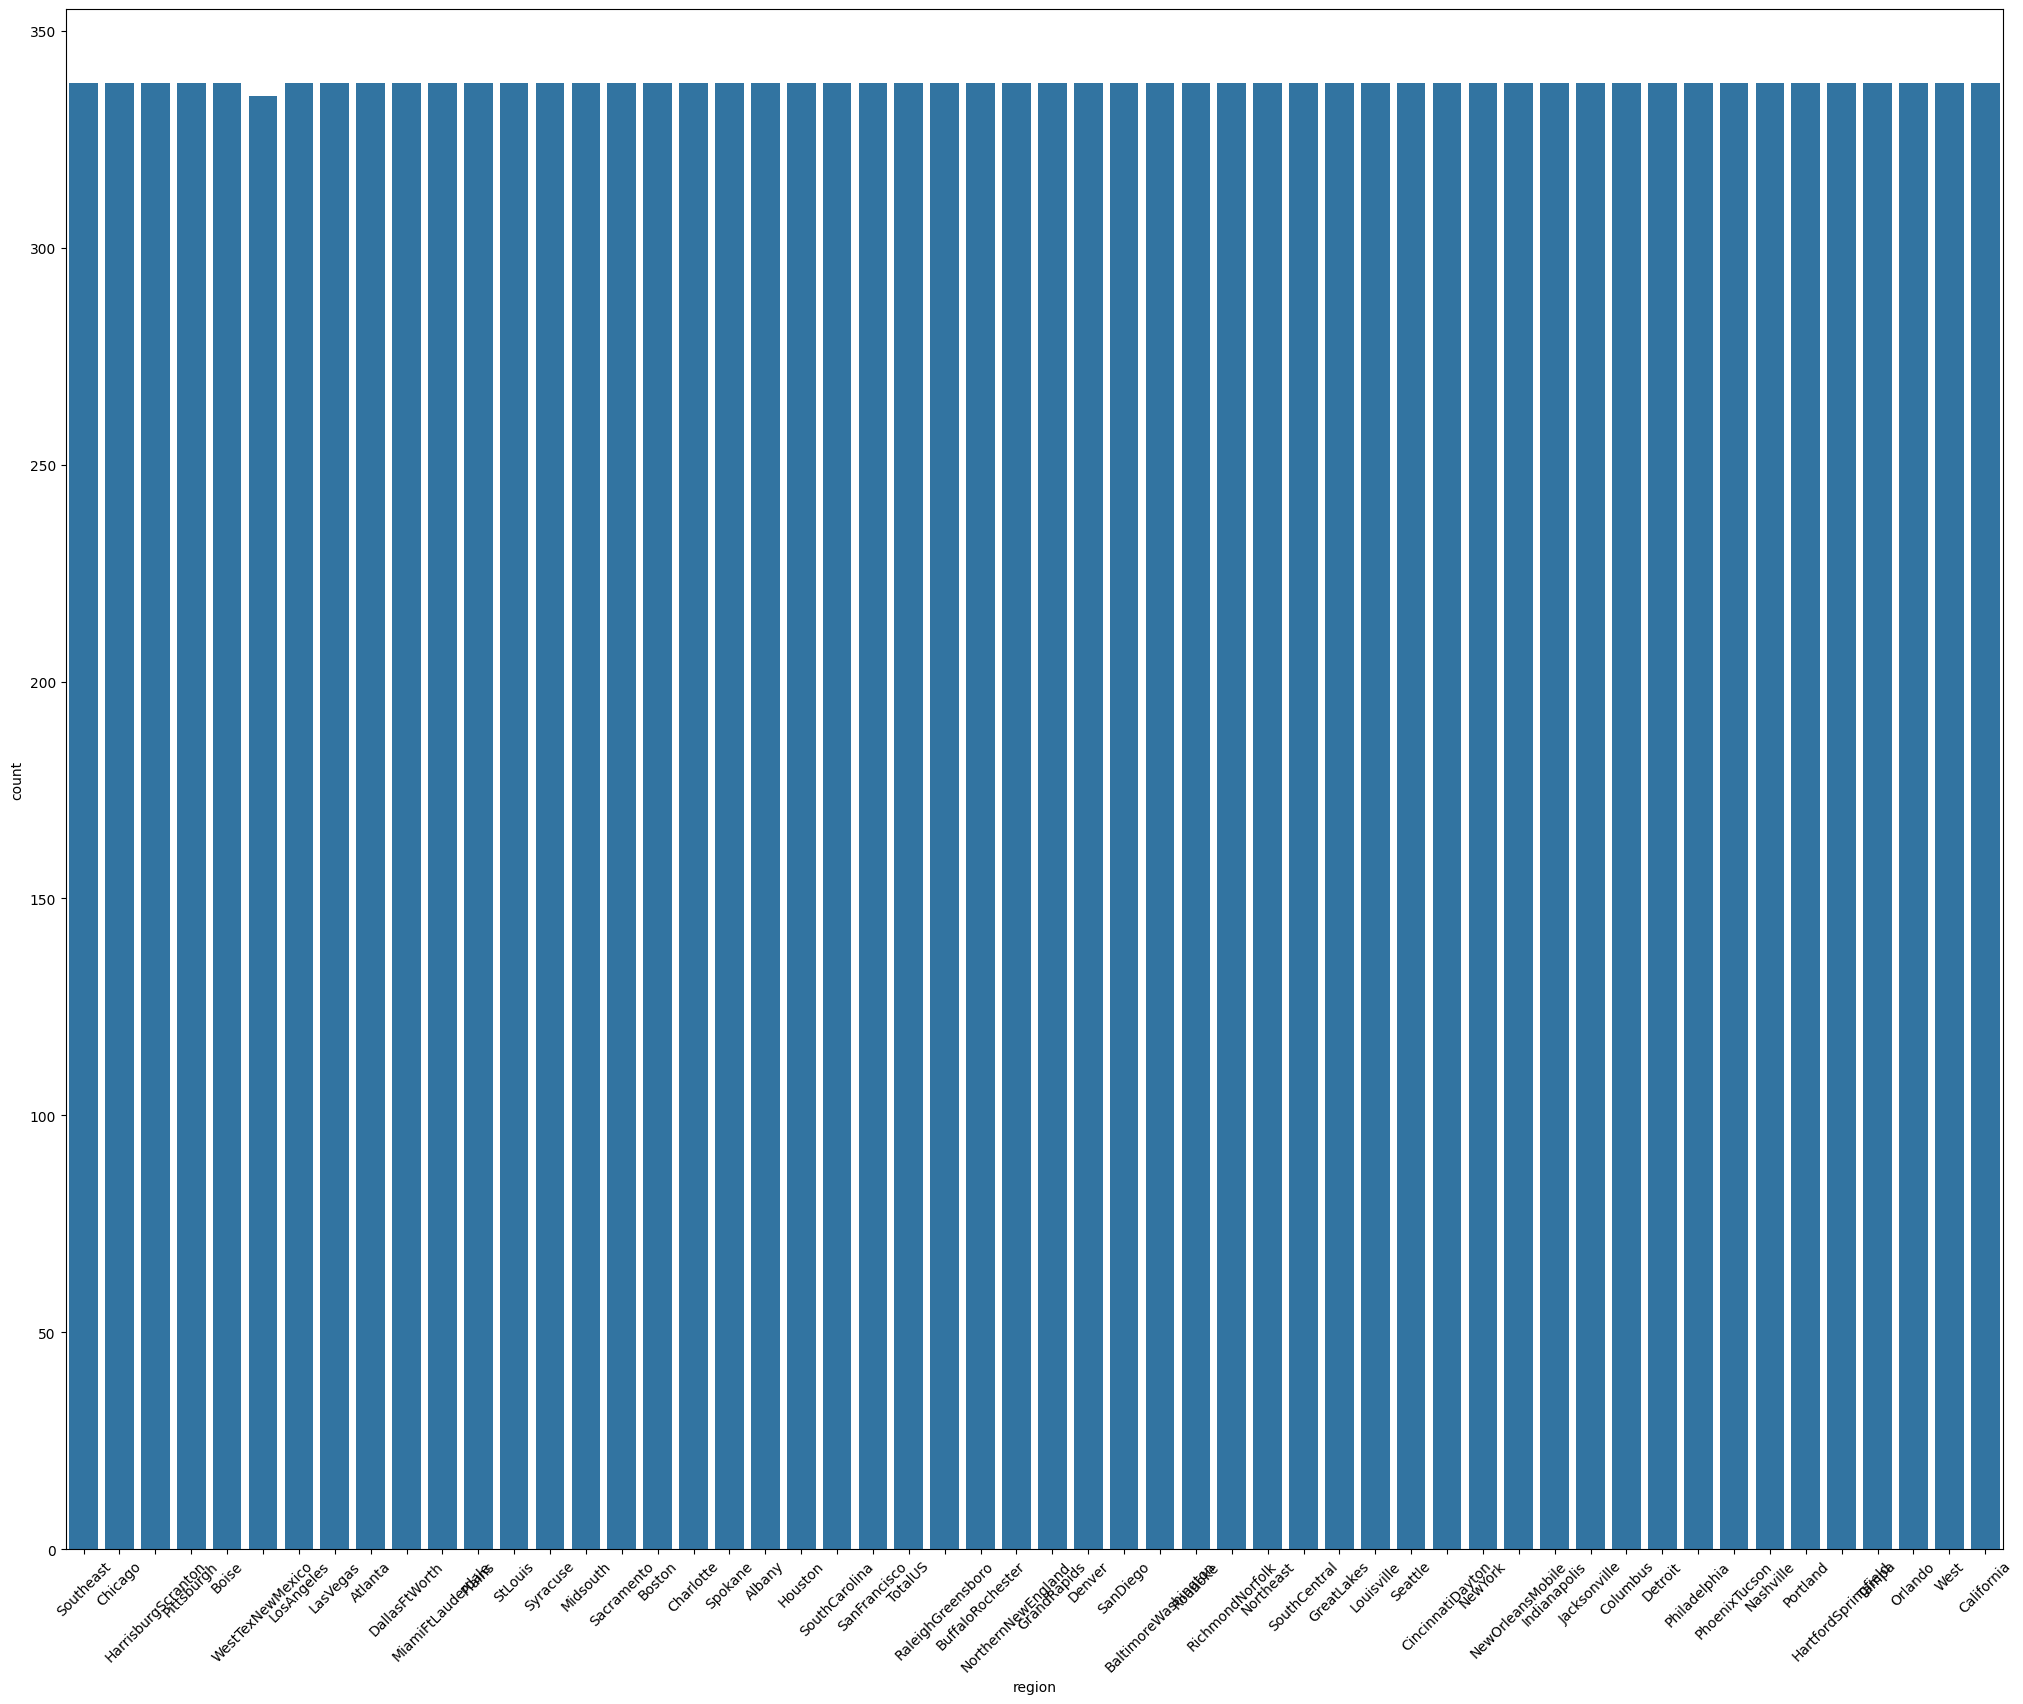

In [60]:
plt.figure(figsize=(25,20))
sns.countplot(x=avocado_dataframe['region'])
plt.xticks(rotation=45) #Rotates the xlabels

In [54]:
avocado_dataframe['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

## **Get the yearly count of Avocado Sales**

<ipython-input-59-6370d5711159>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year',data=avocado_dataframe,palette='viridis')


<Axes: xlabel='year', ylabel='count'>

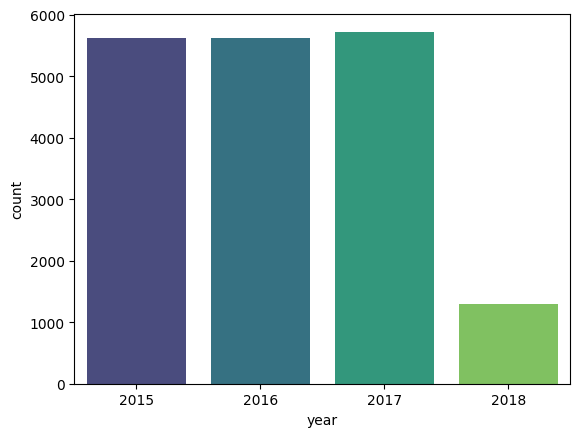

In [59]:
sns.countplot(x='year',data=avocado_dataframe,palette='viridis')

# **Create the data to be used for prediction based on the Date and Average Avocado Price**

In [64]:
avocado_dataframe_prophet=avocado_dataframe[['Date','AveragePrice']]
avocado_dataframe_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [66]:
avocado_dataframe_prophet=avocado_dataframe_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
avocado_dataframe_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# **Predict Future Average Price using Prophet and the Dataframe containing Dates and Average Prices**

In [67]:
model=Prophet()
model.fit(avocado_dataframe_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/qxpsrsum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/ydkvr_yg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95743', 'data', 'file=/tmp/tmp56tcwng7/qxpsrsum.json', 'init=/tmp/tmp56tcwng7/ydkvr_yg.json', 'output', 'file=/tmp/tmp56tcwng7/prophet_modelt4_4i8ei/prophet_model-20240806120818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Predict Future Average prices after one year**

In [69]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

In [70]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498526,0.907359,1.860684,1.498526,1.498526,-0.114083,-0.114083,-0.114083,-0.114083,-0.114083,-0.114083,0.0,0.0,0.0,1.384443
1,2015-01-11,1.493353,0.896271,1.831118,1.493353,1.493353,-0.105627,-0.105627,-0.105627,-0.105627,-0.105627,-0.105627,0.0,0.0,0.0,1.387726
2,2015-01-18,1.488179,0.919165,1.849423,1.488179,1.488179,-0.105282,-0.105282,-0.105282,-0.105282,-0.105282,-0.105282,0.0,0.0,0.0,1.382897
3,2015-01-25,1.483005,0.884012,1.835560,1.483005,1.483005,-0.124214,-0.124214,-0.124214,-0.124214,-0.124214,-0.124214,0.0,0.0,0.0,1.358791
4,2015-02-01,1.477832,0.808931,1.801279,1.477832,1.477832,-0.152537,-0.152537,-0.152537,-0.152537,-0.152537,-0.152537,0.0,0.0,0.0,1.325295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164124,0.555494,1.617366,0.983205,1.348186,-0.086273,-0.086273,-0.086273,-0.086273,-0.086273,-0.086273,0.0,0.0,0.0,1.077850
530,2019-03-22,1.163396,0.569369,1.617218,0.982205,1.348451,-0.084573,-0.084573,-0.084573,-0.084573,-0.084573,-0.084573,0.0,0.0,0.0,1.078823
531,2019-03-23,1.162669,0.554293,1.618299,0.981205,1.348716,-0.082598,-0.082598,-0.082598,-0.082598,-0.082598,-0.082598,0.0,0.0,0.0,1.080071
532,2019-03-24,1.161941,0.534914,1.597862,0.979885,1.348969,-0.080368,-0.080368,-0.080368,-0.080368,-0.080368,-0.080368,0.0,0.0,0.0,1.081573


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


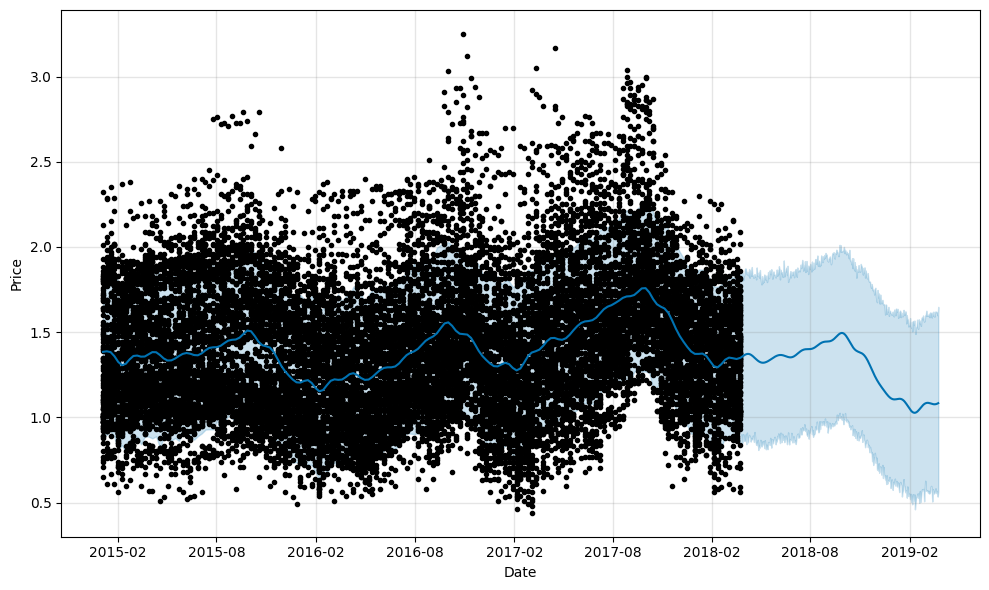

In [72]:
figure=model.plot(forecast,xlabel='Date',ylabel='Price')

## **Check for Seasonality**

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

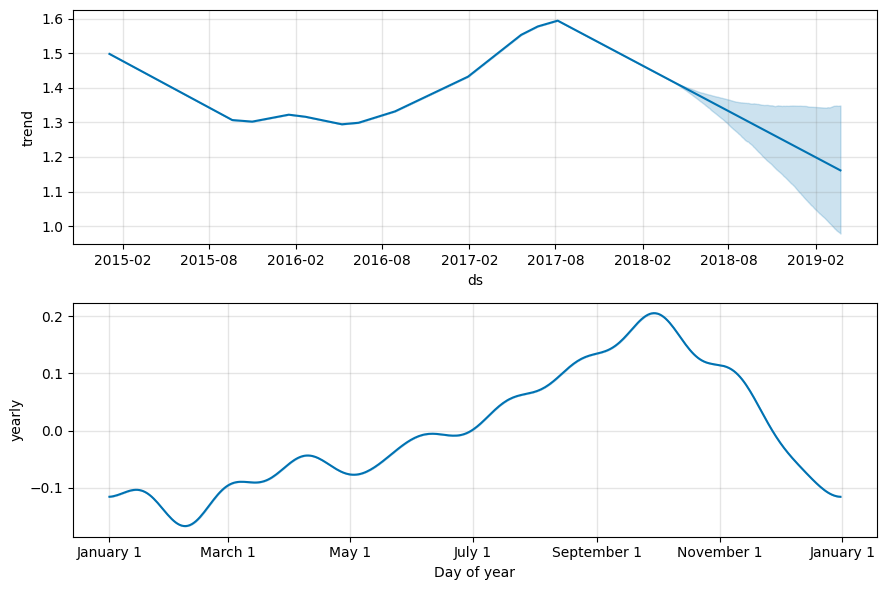

In [73]:
figure=model.plot_components(forecast)

# **Prediction of Prices of Avocado in Boston**

In [81]:
avocado_dataframe

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [82]:
avocado_prices_Boston=avocado_dataframe[avocado_dataframe['region']=='Boston']
avocado_prices_Boston

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
259,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
9385,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston
258,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.00,conventional,2015,Boston
9384,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.00,organic,2015,Boston
9383,2015-01-18,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.00,organic,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,2018-03-11,1.85,30476.66,8.51,2114.28,0.00,28353.87,22732.95,5620.92,0.00,organic,2018,Boston
17650,2018-03-18,1.83,34809.90,20.31,2456.48,0.00,32333.11,25094.65,7238.46,0.00,organic,2018,Boston
8527,2018-03-18,1.38,602177.43,24831.59,443903.93,1853.86,131588.05,101891.24,28125.70,1571.11,conventional,2018,Boston
8526,2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,134373.62,109938.39,22955.23,1480.00,conventional,2018,Boston


In [83]:
avocado_prices_Boston['Total Prices']=avocado_prices_Boston['Total Volume']*avocado_prices_Boston['AveragePrice']
avocado_prices_Boston

<ipython-input-83-d34a3879d44d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_prices_Boston['Total Prices']=avocado_prices_Boston['Total Volume']*avocado_prices_Boston['AveragePrice']


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Prices
259,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,501572.7600
9385,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston,4011.5979
258,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.00,conventional,2015,Boston,481549.0790
9384,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.00,organic,2015,Boston,4302.5708
9383,2015-01-18,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.00,organic,2015,Boston,4418.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,2018-03-11,1.85,30476.66,8.51,2114.28,0.00,28353.87,22732.95,5620.92,0.00,organic,2018,Boston,56381.8210
17650,2018-03-18,1.83,34809.90,20.31,2456.48,0.00,32333.11,25094.65,7238.46,0.00,organic,2018,Boston,63702.1170
8527,2018-03-18,1.38,602177.43,24831.59,443903.93,1853.86,131588.05,101891.24,28125.70,1571.11,conventional,2018,Boston,831004.8534
8526,2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,134373.62,109938.39,22955.23,1480.00,conventional,2018,Boston,891632.7777


## **Get the Data to be used for Prophet**

In [84]:
avocado_prophet_Boston=avocado_prices_Boston[['Date','Total Prices']]
avocado_prophet_Boston

,Date,Total Prices
259,2015-01-04,501572.7600
9385,2015-01-04,4011.5979
258,2015-01-11,481549.0790
9384,2015-01-11,4302.5708
9383,2015-01-18,4418.6800
...,...,...
17651,2018-03-11,56381.8210
17650,2018-03-18,63702.1170
8527,2018-03-18,831004.8534
8526,2018-03-25,891632.7777


In [87]:
avocado_prophet_Boston=avocado_prophet_Boston.rename(columns={'Date':'ds','Total Prices':'y'})
avocado_prophet_Boston

,ds,y
259,2015-01-04,501572.7600
9385,2015-01-04,4011.5979
258,2015-01-11,481549.0790
9384,2015-01-11,4302.5708
9383,2015-01-18,4418.6800
...,...,...
17651,2018-03-11,56381.8210
17650,2018-03-18,63702.1170
8527,2018-03-18,831004.8534
8526,2018-03-25,891632.7777


## **Create the model and predict the data**

In [99]:
model1=Prophet()
model1.fit(avocado_prophet_Boston)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/beqqpq55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/i16mpp90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48485', 'data', 'file=/tmp/tmp56tcwng7/beqqpq55.json', 'init=/tmp/tmp56tcwng7/i16mpp90.json', 'output', 'file=/tmp/tmp56tcwng7/prophet_model5vqyv8zs/prophet_model-20240806123211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
future=model.make_future_dataframe(periods=7300)
forecast=model.predict(future)

In [105]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498526,0.875614,1.823350,1.498526,1.498526,-0.114083,-0.114083,-0.114083,-0.114083,-0.114083,-0.114083,0.0,0.0,0.0,1.384443
1,2015-01-11,1.493353,0.930058,1.853502,1.493353,1.493353,-0.105627,-0.105627,-0.105627,-0.105627,-0.105627,-0.105627,0.0,0.0,0.0,1.387726
2,2015-01-18,1.488179,0.874585,1.852401,1.488179,1.488179,-0.105282,-0.105282,-0.105282,-0.105282,-0.105282,-0.105282,0.0,0.0,0.0,1.382897
3,2015-01-25,1.483005,0.854045,1.829912,1.483005,1.483005,-0.124214,-0.124214,-0.124214,-0.124214,-0.124214,-0.124214,0.0,0.0,0.0,1.358791
4,2015-02-01,1.477832,0.833892,1.818593,1.477832,1.477832,-0.152537,-0.152537,-0.152537,-0.152537,-0.152537,-0.152537,0.0,0.0,0.0,1.325295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,2038-03-16,-3.881218,-21.407099,14.853153,-21.296365,14.892505,-0.090489,-0.090489,-0.090489,-0.090489,-0.090489,-0.090489,0.0,0.0,0.0,-3.971707
7465,2038-03-17,-3.881945,-21.318689,14.836208,-21.301659,14.893178,-0.090104,-0.090104,-0.090104,-0.090104,-0.090104,-0.090104,0.0,0.0,0.0,-3.972049
7466,2038-03-18,-3.882673,-21.352815,14.867888,-21.306953,14.893851,-0.089467,-0.089467,-0.089467,-0.089467,-0.089467,-0.089467,0.0,0.0,0.0,-3.972140
7467,2038-03-19,-3.883400,-21.466167,14.830152,-21.312247,14.894524,-0.088557,-0.088557,-0.088557,-0.088557,-0.088557,-0.088557,0.0,0.0,0.0,-3.971957


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


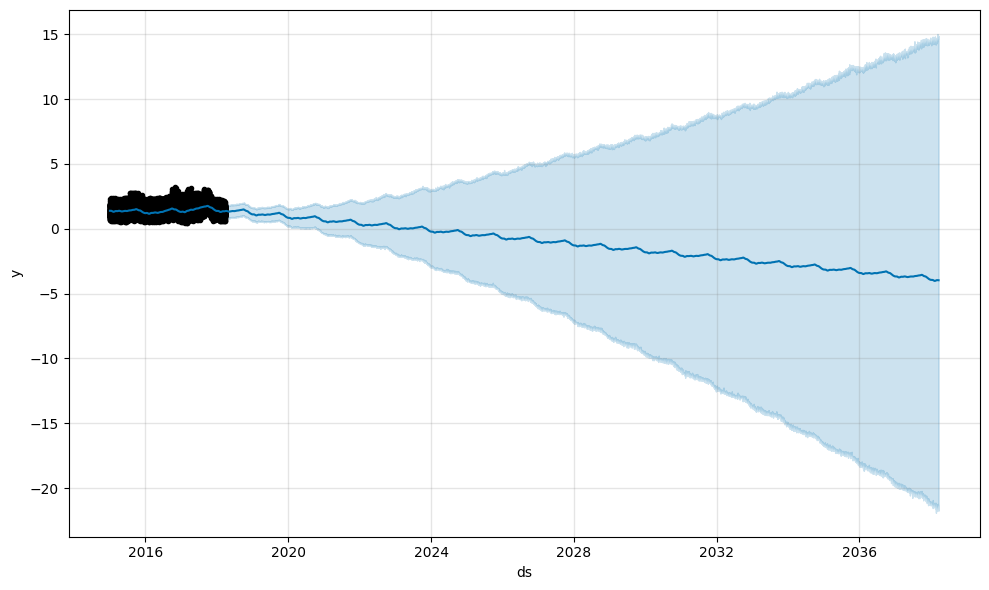

In [106]:
figure=model.plot(forecast)

### **Check for seasonality**

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

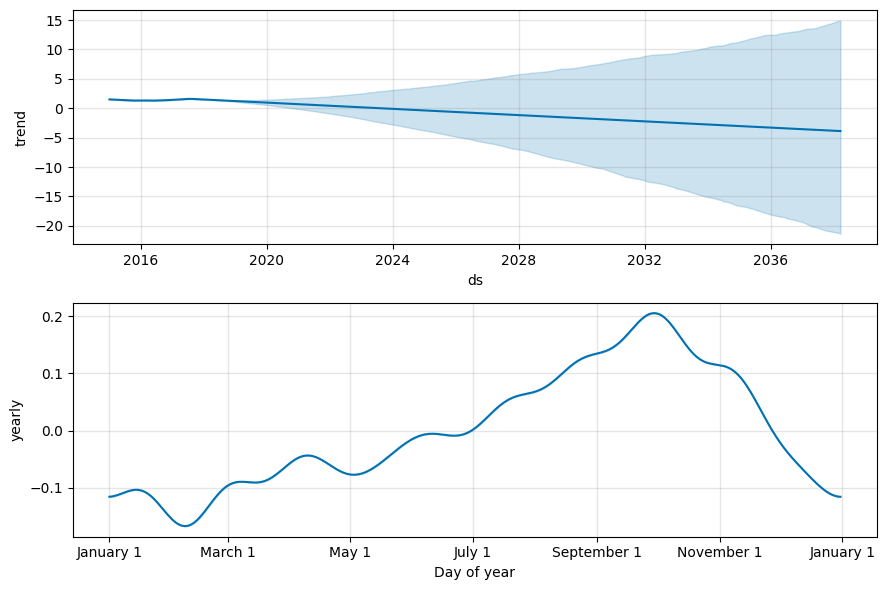

In [107]:
figure=model.plot_components(forecast)

## **Predict the Average Prices in Boston after one year**

### **Get the data**

In [108]:
avocado_prices_Boston

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Prices
259,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,501572.7600
9385,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston,4011.5979
258,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.00,conventional,2015,Boston,481549.0790
9384,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.00,organic,2015,Boston,4302.5708
9383,2015-01-18,2.00,2209.34,4.22,834.34,0.00,1370.78,1370.78,0.00,0.00,organic,2015,Boston,4418.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,2018-03-11,1.85,30476.66,8.51,2114.28,0.00,28353.87,22732.95,5620.92,0.00,organic,2018,Boston,56381.8210
17650,2018-03-18,1.83,34809.90,20.31,2456.48,0.00,32333.11,25094.65,7238.46,0.00,organic,2018,Boston,63702.1170
8527,2018-03-18,1.38,602177.43,24831.59,443903.93,1853.86,131588.05,101891.24,28125.70,1571.11,conventional,2018,Boston,831004.8534
8526,2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,134373.62,109938.39,22955.23,1480.00,conventional,2018,Boston,891632.7777


In [109]:
avocado_prophet_Boston2=avocado_prices_Boston[['Date','AveragePrice']]
avocado_prophet_Boston2

,Date,AveragePrice
259,2015-01-04,1.02
9385,2015-01-04,1.83
258,2015-01-11,1.10
9384,2015-01-11,1.94
9383,2015-01-18,2.00
...,...,...
17651,2018-03-11,1.85
17650,2018-03-18,1.83
8527,2018-03-18,1.38
8526,2018-03-25,1.39


### **Create the model and predict the data**

In [110]:
avocado_prophet_Boston2=avocado_prophet_Boston2.rename(columns={'Date':'ds','AveragePrice':'y'})
avocado_prophet_Boston2

,ds,y
259,2015-01-04,1.02
9385,2015-01-04,1.83
258,2015-01-11,1.10
9384,2015-01-11,1.94
9383,2015-01-18,2.00
...,...,...
17651,2018-03-11,1.85
17650,2018-03-18,1.83
8527,2018-03-18,1.38
8526,2018-03-25,1.39


In [123]:
model2=Prophet()
model2.fit(avocado_prophet_Boston2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/8yso0c8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56tcwng7/ovowwbkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76725', 'data', 'file=/tmp/tmp56tcwng7/8yso0c8j.json', 'init=/tmp/tmp56tcwng7/ovowwbkr.json', 'output', 'file=/tmp/tmp56tcwng7/prophet_model5i_vmp1x/prophet_model-20240806124306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [124]:
future=model2.make_future_dataframe(periods=2190)
forecast=model2.predict(future)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.465660,1.028177,1.811140,1.465660,1.465660,-0.067025,-0.067025,-0.067025,-0.067025,-0.067025,-0.067025,0.0,0.0,0.0,1.398634
1,2015-01-11,1.465198,1.035674,1.804300,1.465198,1.465198,-0.068729,-0.068729,-0.068729,-0.068729,-0.068729,-0.068729,0.0,0.0,0.0,1.396469
2,2015-01-18,1.464737,1.000163,1.777359,1.464737,1.464737,-0.079293,-0.079293,-0.079293,-0.079293,-0.079293,-0.079293,0.0,0.0,0.0,1.385443
3,2015-01-25,1.464275,0.982148,1.738525,1.464275,1.464275,-0.085742,-0.085742,-0.085742,-0.085742,-0.085742,-0.085742,0.0,0.0,0.0,1.378533
4,2015-02-01,1.463813,0.992500,1.789250,1.463813,1.463813,-0.078223,-0.078223,-0.078223,-0.078223,-0.078223,-0.078223,0.0,0.0,0.0,1.385591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,2024-03-19,2.612839,2.162205,3.140039,2.339583,2.904578,0.023690,0.023690,0.023690,0.023690,0.023690,0.023690,0.0,0.0,0.0,2.636529
2355,2024-03-20,2.613243,2.175833,3.165239,2.339887,2.905100,0.026952,0.026952,0.026952,0.026952,0.026952,0.026952,0.0,0.0,0.0,2.640195
2356,2024-03-21,2.613647,2.163266,3.145567,2.340189,2.905622,0.030103,0.030103,0.030103,0.030103,0.030103,0.030103,0.0,0.0,0.0,2.643750
2357,2024-03-22,2.614050,2.189618,3.128846,2.340450,2.906145,0.033133,0.033133,0.033133,0.033133,0.033133,0.033133,0.0,0.0,0.0,2.647184


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


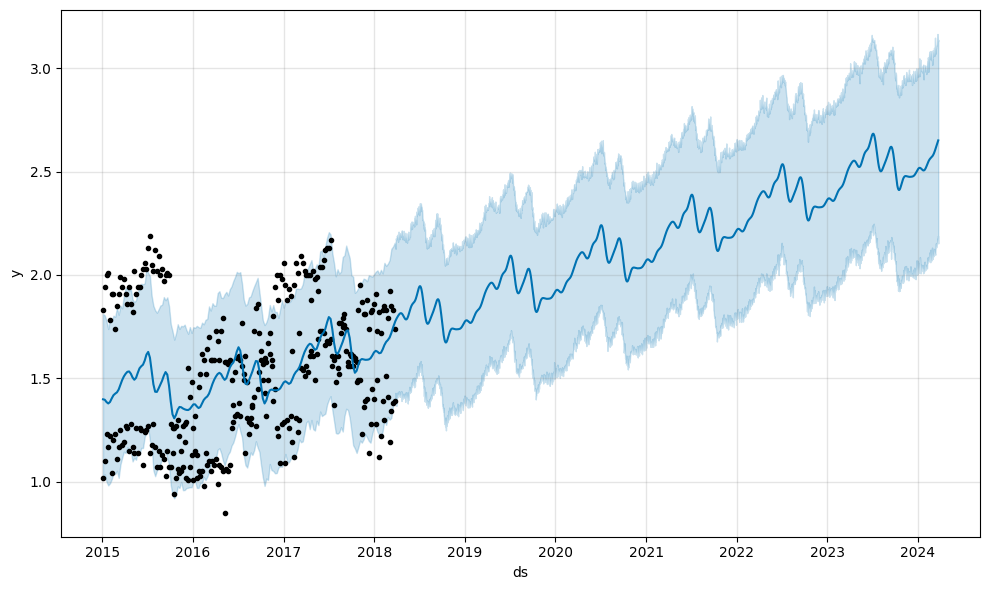

In [126]:
figure=model2.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

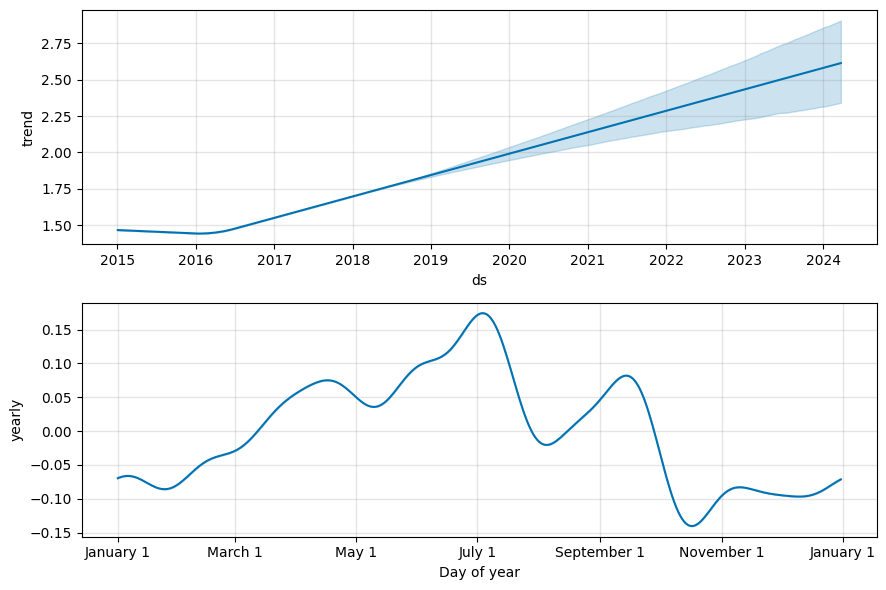

In [127]:
figure=model2.plot_components(forecast)